<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/6_Decision_Tree_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree vs. Logistic Regression

## Logistic regression

In [1]:
import pandas as pd
wine = pd.read_csv('https://raw.githubusercontent.com/kjmobile/data/main/ml/wine_csv.csv')

In [2]:
wine.shape

(6497, 4)

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine['class'].nunique()

2

In [5]:
# prints information about a DataFrame
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=17)

In [9]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7856455647488936
0.7676923076923077


In [12]:
lr.score?

Signature: lr.score(X, y, sample_weight=None)
Docstring:
Return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True labels for `X`.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

Returns
-------
score : float
    Mean accuracy of ``self.predict(X)`` w.r.t. `y`.
File:      c:\users\leek27\appdata\local\anaconda3\lib\site-packages\sklearn\base.py
Type:      method

### Interpretability of models (logistic regression vs. decision tree)

In [13]:
print(lr.coef_, lr.intercept_)

[[ 0.56294832  1.68496352 -0.71573328]] [1.79734007]


## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=17) # what's the default criterion in sklearn?
dt.fit(train_scaled, train_target) # what is target variable here?

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) # does it show the model is overfitted?

0.9976909755628247
0.8507692307692307


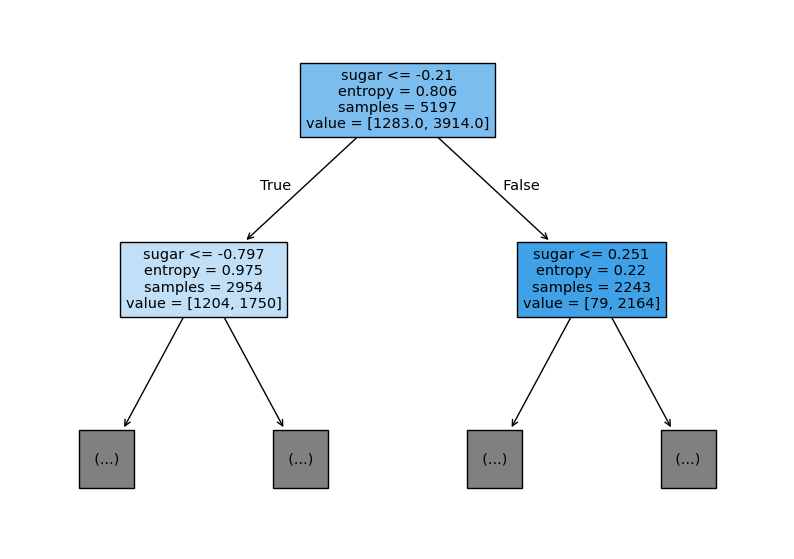

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alchol','sugar','ph'])
plt.show()

In [16]:
plot_tree?

Signature:
plot_tree(
    decision_tree,
    *,
    max_depth=None,
    feature_names=None,
    class_names=None,
    label='all',
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rounded=False,
    precision=3,
    ax=None,
    fontsize=None,
)
Docstring:
Plot a decision tree.

The sample counts that are shown are weighted with any sample_weights that
might be present.

The visualization is fit automatically to the size of the axis.
Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
the size of the rendering.

Read more in the :ref:`User Guide <tree>`.

.. versionadded:: 0.21

Parameters
----------
decision_tree : decision tree regressor or classifier
    The decision tree to be plotted.

max_depth : int, default=None
    The maximum depth of the representation. If None, the tree is fully
    generated.

feature_names : array-like of str, default=None
    Names of each of the features.
    If None, generic names will be used ("x[0]

### Pruning

In [17]:
# prune to avoid overfitting.
dt = DecisionTreeClassifier(max_depth=4, random_state=17, criterion='log_loss')
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) # did this ameliorate overfitting ?

0.8551087165672503
0.8646153846153846


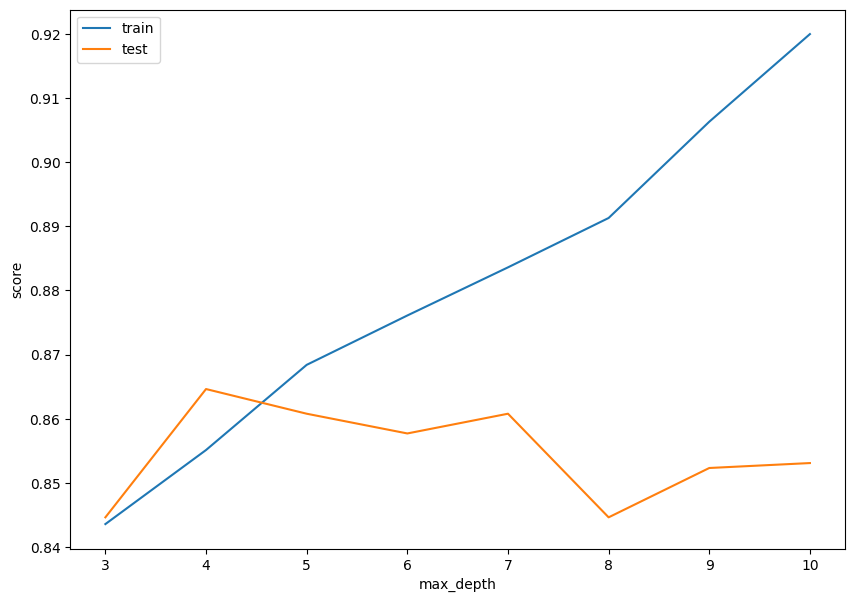

In [18]:
# Why chose max_depth= 4? : Draw a comparison of train vs test scores through a plot by changing max_depth from 3 to 10

train_scores = []
test_scores = []

for max_depth in range(3, 11):
    dt1 = DecisionTreeClassifier(max_depth=max_depth, random_state=17, criterion='entropy')
    dt1.fit(train_scaled, train_target)

    train_scores.append(dt1.score(train_scaled, train_target))
    test_scores.append(dt1.score(test_scaled, test_target))

plt.figure(figsize=(10, 7))
plt.plot(range(3, 11), train_scores, label="train")
plt.plot(range(3, 11), test_scores, label="test")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()


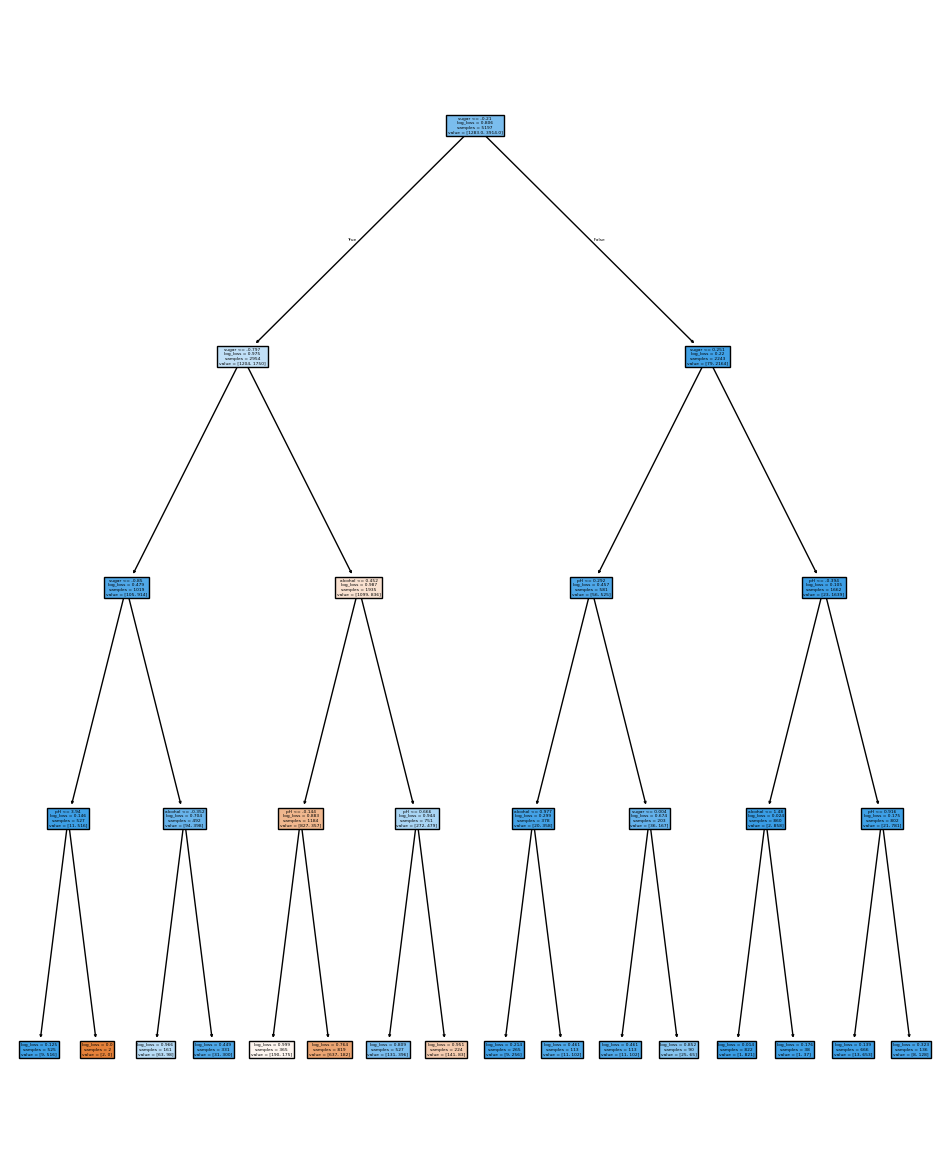

In [19]:
# now plot the tree!
plt.figure(figsize=(12,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # when filled=True, does the filled color have any meaning ?
plt.show()

In [20]:
print(dt.feature_importances_) # what does the feature_importance_ show and how, it is used in other modeling?

[0.11293851 0.79208984 0.09497165]


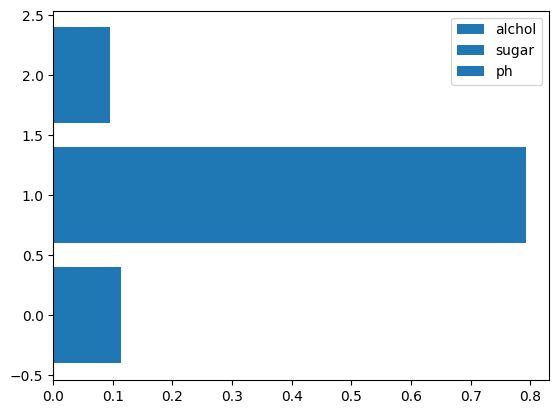

In [21]:
plt.barh(range(3), width=dt.feature_importances_, label=['alchol', 'sugar', 'ph'])
plt.legend()

Feature importance represents the contribution ratio of each feature to the impurity reduction in a decision tree. The calculation formula is as follows:


Feature Importance =
$$\frac{\text{Total Impurity Reduction by the Feature}}{\text{Sum of Impurity Reductions Across All Features}}$$


## More to understand

### Predict categories using the test_input


In [22]:
dt_prediction = dt.predict(test_input)
print(dt_prediction)

[1. 1. 1. ... 1. 1. 1.]


### Show Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_target, dt_prediction)
cm_df=pd.DataFrame(cm, columns=['predicted_0', 'predict_1'], index=['actual_0','actual_1'])
print(cm_df)

          predicted_0  predict_1
actual_0            0        316
actual_1            0        984


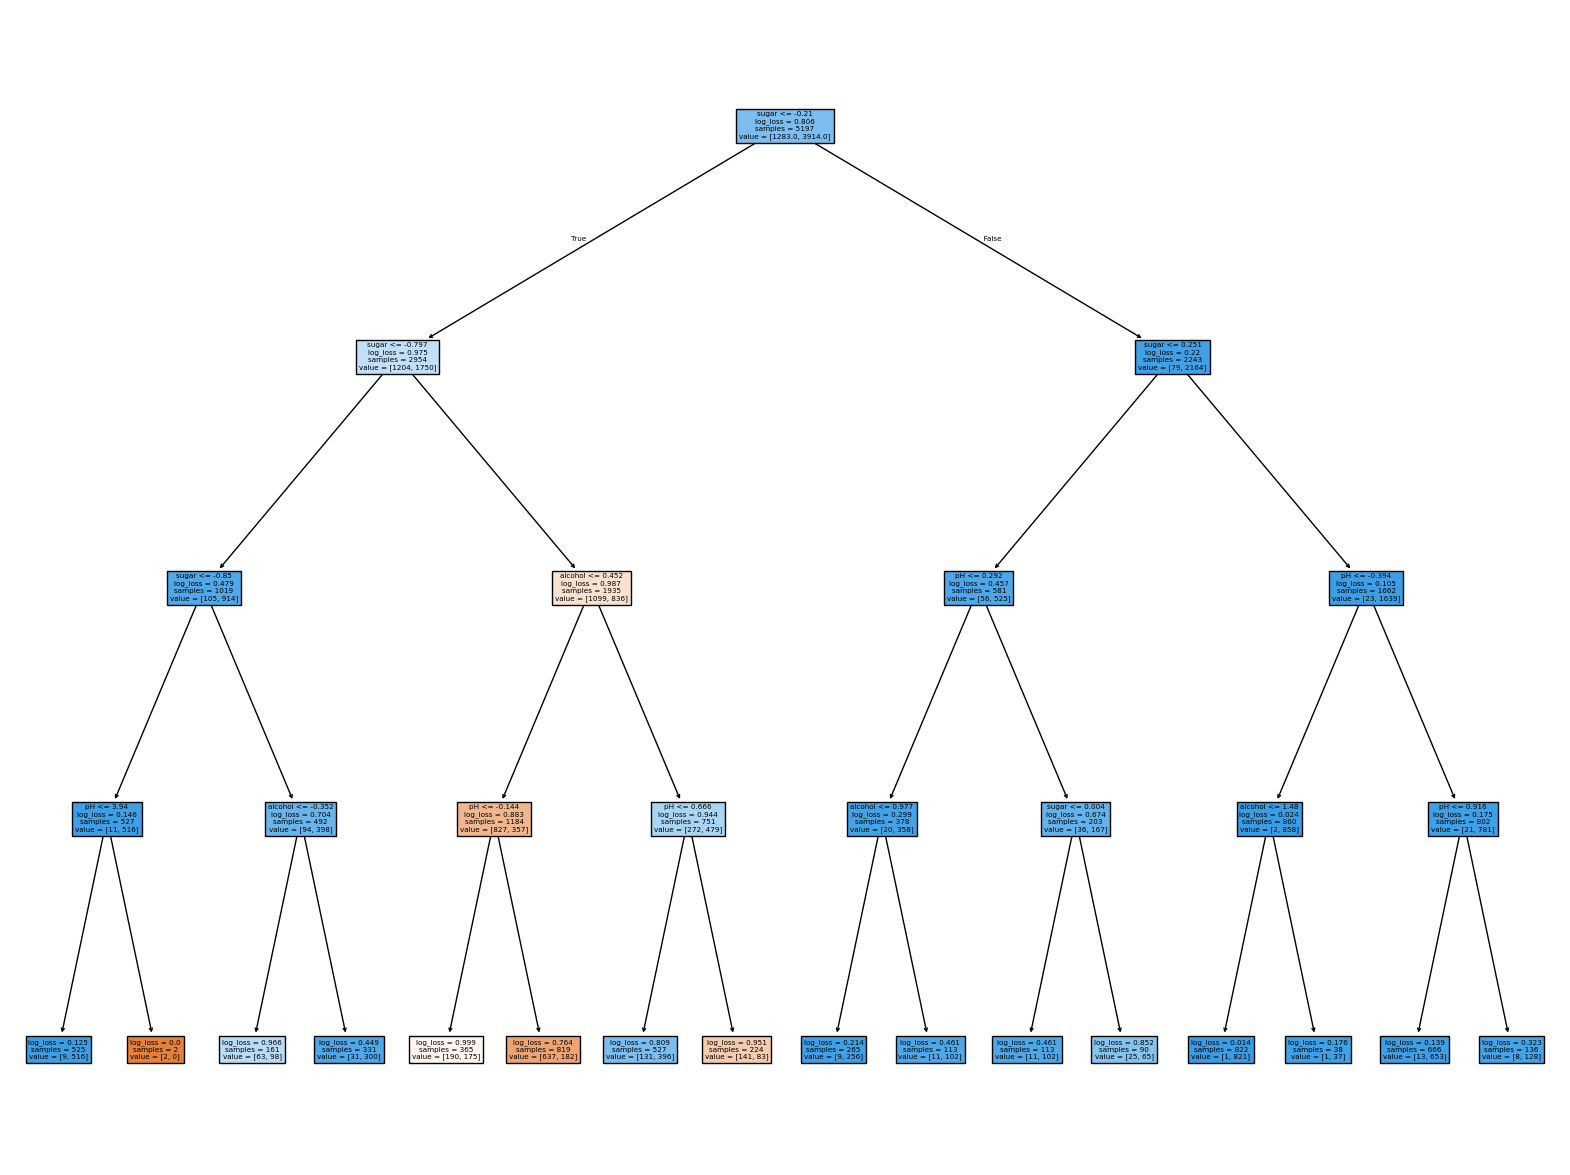

In [24]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### Information Gain

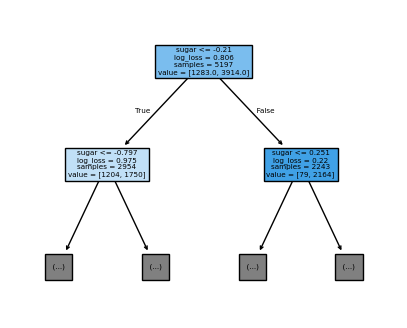

In [25]:
plt.figure(figsize=(5,4))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # what if you do not pass the argument of feature_names?
plt.show()

In [26]:
# In the above chart the inital entropy is .806 and
# when the data (5197) is split ( 2954 [on left] + 2243 [on right]), entropy per each is 0.975 and 0.22
# Hence the information gain by this split is:

initial_entropy = 0.806
left_entropy = 0.975
right_entropy = 0.22
left_proportion = 2954 / (2954 + 2243)
right_proportion = 2243 / (2954 + 2243)
entropy_after_split = left_proportion * left_entropy + right_proportion * right_entropy
information_gain = 0  # fix the line here to compute information gain correctly.
print(f'I(Dp) : {initial_entropy}')
print(f'I(Dj): {entropy_after_split}')
print(f'IG : {information_gain}')


I(Dp) : 0.806
I(Dj): 0.6491456609582451
IG : 0


In [27]:
initial_entropy - entropy_after_split

0.15685433904175494

### Using min_impurity_decrease instead of max_depth

In [28]:
dt2 = DecisionTreeClassifier(min_impurity_decrease=0.001, random_state=17) #min_impurity_decrease= is used to replace what parameter used above?
dt2.fit(train_input, train_target)

print(dt2.score(train_input, train_target))
print(dt2.score(test_input, test_target))

0.8716567250336733
0.8646153846153846


## Entropy vs. Gini Impurity

$$Entropy(D) = -\sum_{i=1}^{n}p_ilog_2(p_i)$$
$$Gini(D) = \sum_{i=1}^{n}p_i^2$$

Gini impurity and entropy are in a monotonic relationship, meaning they increase or decrease together based on the uniformity or imbalance of the probability distribution.
Gini impurity is more commonly used in decision trees than entropy because it has a lower computational cost.

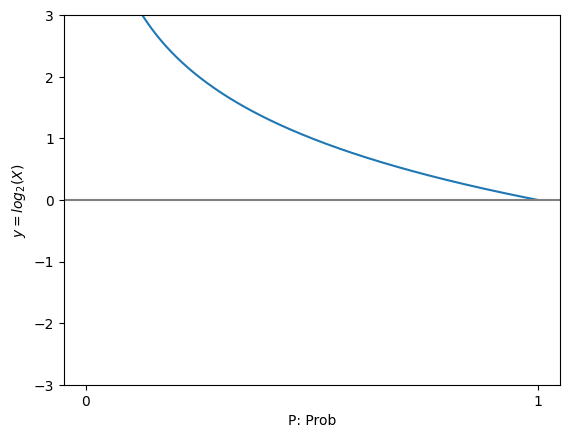

In [159]:
import numpy as np
p=np.linspace(0.001,0.999, 1000)
entropy = -p * np.log2(p) - (1-p) * np.log2(1-p)
entropy_left= -p * np.log2(p) 
entropy_right= -(1-p) * np.log2(1-p) 

plt.plot(p,-np.log2(p))
# plt.plot(p, entropy_left)
# plt.plot(p, entropy_right)
# plt.plot(p, entropy)

plt.axhline(y=0, color='grey')
plt.xticks([0,1])
plt.ylim(-3,3)
plt.gca().set(xlabel='P: Prob', ylabel='$y=log_2(X)$');

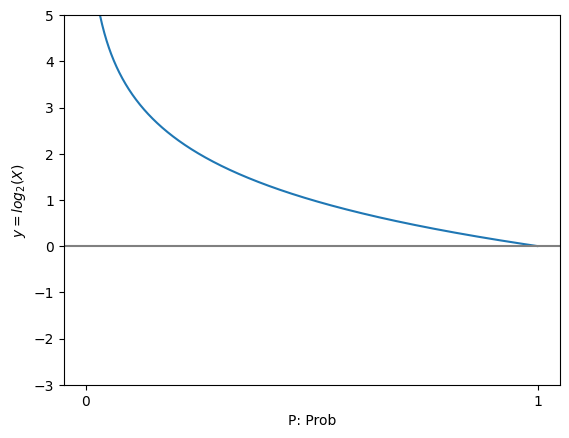

In [163]:
import numpy as np
import matplotlib.pyplot as plt


plt.plot(p, -np.log2(p))

plt.axhline(y=0, color='grey')
plt.xticks([0, 1])
plt.ylim(-3, 5)
plt.gca().set(xlabel='P: Prob', ylabel='$y=log_2(X)$')
plt.show()

<>:48: SyntaxWarning: invalid escape sequence '\l'
<>:48: SyntaxWarning: invalid escape sequence '\l'
C:\Users\leek27\AppData\Local\Temp\ipykernel_107628\3680256848.py:48: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('$-\log_2(p)$', fontsize=11)
C:\Users\leek27\AppData\Local\Temp\ipykernel_107628\3680256848.py:54: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leek27\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


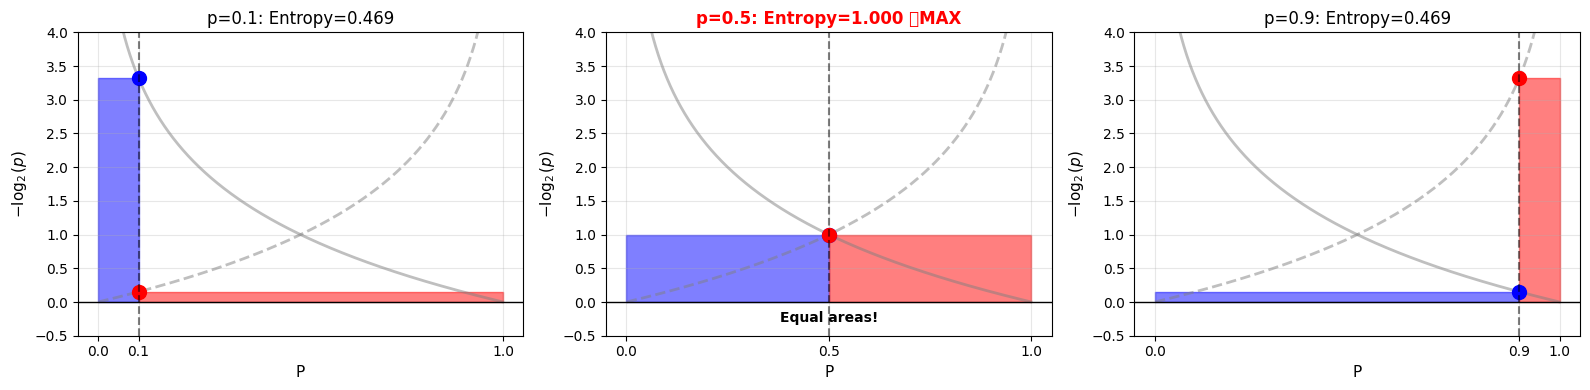

In [168]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

p_values = [0.1, 0.5, 0.9]

for idx, p_val in enumerate(p_values):
    ax = axes[idx]
    p = np.linspace(0.001, 0.999, 1000)
    
    # 두 개의 곡선
    info_p = -np.log2(p)
    info_1minusp = -np.log2(1-p)
    
    # 현재 p 값에서의 높이
    height_left = -np.log2(p_val)      # 파란 박스 높이
    height_right = -np.log2(1-p_val)   # 빨간 박스 높이 (중요!)
    
    # 곡선 그리기
    ax.plot(p, info_p, 'gray', alpha=0.5, linewidth=2)
    ax.plot(p, info_1minusp, 'gray', alpha=0.5, linewidth=2, linestyle='--')
    
    # 사각형 - 올바른 높이 사용
    ax.fill_between([0, p_val], 0, height_left, alpha=0.5, color='blue')
    ax.fill_between([p_val, 1], 0, height_right, alpha=0.5, color='red')
    
    # 점 표시
    ax.plot(p_val, height_left, 'bo', markersize=10)
    ax.plot(p_val, height_right, 'ro', markersize=10)
    
    # 수직선
    ax.axvline(p_val, color='black', linestyle='--', alpha=0.5)
    ax.axhline(0, color='black', linewidth=1)
    
    # Entropy 계산
    entropy = p_val * height_left + (1-p_val) * height_right
    
    # 제목
    if p_val == 0.5:
        ax.set_title(f'p={p_val}: Entropy={entropy:.3f} ⭐MAX', 
                     fontsize=12, fontweight='bold', color='red')
        ax.text(0.5, -0.3, 'Equal areas!', ha='center', fontweight='bold')
    else:
        ax.set_title(f'p={p_val}: Entropy={entropy:.3f}', fontsize=12)
    
    ax.set_xlabel('P', fontsize=11)
    ax.set_ylabel('$-\log_2(p)$', fontsize=11)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.5, 4)
    ax.set_xticks([0, p_val, 1])
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

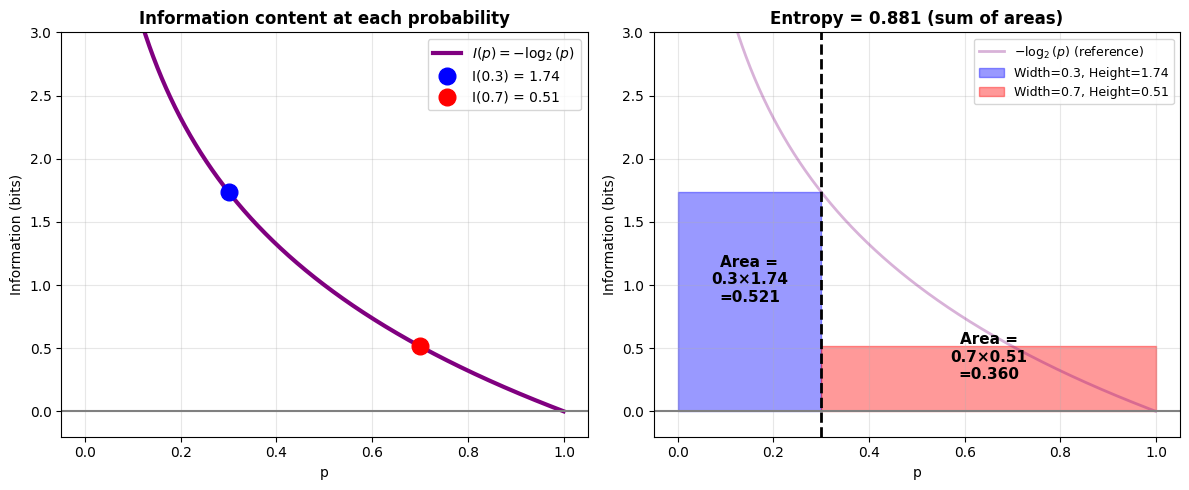


수식 확인:
H = p × [-log₂(p)] + (1-p) × [-log₂(1-p)]
H = 0.3 × 1.737 + 0.7 × 0.515
H = 0.521 + 0.360
H = 0.881

사각형 해석:
- 파란 박스: 너비(확률) × 높이(정보량) = 0.3 × 1.74 = 0.521
- 빨간 박스: 너비(확률) × 높이(정보량) = 0.7 × 0.51 = 0.360
- Entropy = 두 면적의 합



In [172]:
import numpy as np
import matplotlib.pyplot as plt

p_val = 0.3
p = np.linspace(0.001, 0.999, 1000)

plt.figure(figsize=(12, 5))

# 왼쪽: 정보량 곡선 (Information)
plt.subplot(1, 2, 1)
plt.plot(p, -np.log2(p), 'purple', linewidth=3, label=r'$I(p) = -\log_2(p)$')
plt.plot(p_val, -np.log2(p_val), 'bo', markersize=12, 
         label=f'I({p_val}) = {-np.log2(p_val):.2f}')
plt.plot(1-p_val, -np.log2(1-p_val), 'ro', markersize=12,
         label=f'I({1-p_val}) = {-np.log2(1-p_val):.2f}')
plt.axhline(0, color='grey')
plt.xlabel('p')
plt.ylabel('Information (bits)')
plt.title('Information content at each probability', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(-0.2, 3)

# 오른쪽: 가중된 정보량 (Weighted Information = Entropy)
plt.subplot(1, 2, 2)
h_left = -np.log2(p_val)      # 정보량
h_right = -np.log2(1-p_val)   # 정보량

# 가중된 높이!
weighted_h_left = p_val * h_left      # p × I(p)
weighted_h_right = (1-p_val) * h_right  # (1-p) × I(1-p)

plt.plot(p, -np.log2(p), 'purple', linewidth=2, alpha=0.3, 
         label=r'$-\log_2(p)$ (reference)')

# 사각형: 너비 × 높이 = 확률 × 정보량
plt.fill_between([0, p_val], 0, h_left, alpha=0.4, color='blue',
                 label=f'Width={p_val}, Height={h_left:.2f}')
plt.fill_between([p_val, 1], 0, h_right, alpha=0.4, color='red',
                 label=f'Width={1-p_val}, Height={h_right:.2f}')

plt.axvline(p_val, color='black', linewidth=2, linestyle='--')
plt.text(p_val/2, h_left/2, 
         f'Area =\n{p_val}×{h_left:.2f}\n={weighted_h_left:.3f}', 
         ha='center', fontsize=11, fontweight='bold')
plt.text(p_val + (1-p_val)/2, h_right/2,
         f'Area =\n{1-p_val}×{h_right:.2f}\n={weighted_h_right:.3f}',
         ha='center', fontsize=11, fontweight='bold')

entropy = weighted_h_left + weighted_h_right
plt.xlabel('p')
plt.ylabel('Information (bits)')
plt.title(f'Entropy = {entropy:.3f} (sum of areas)', fontweight='bold')
plt.legend(fontsize=9)
plt.grid(alpha=0.3)
plt.axhline(0, color='grey')
plt.ylim(-0.2, 3)

plt.tight_layout()
plt.show()

print(f"""
수식 확인:
H = p × [-log₂(p)] + (1-p) × [-log₂(1-p)]
H = {p_val} × {h_left:.3f} + {1-p_val} × {h_right:.3f}
H = {weighted_h_left:.3f} + {weighted_h_right:.3f}
H = {entropy:.3f}

사각형 해석:
- 파란 박스: 너비(확률) × 높이(정보량) = {p_val} × {h_left:.2f} = {weighted_h_left:.3f}
- 빨간 박스: 너비(확률) × 높이(정보량) = {1-p_val} × {h_right:.2f} = {weighted_h_right:.3f}
- Entropy = 두 면적의 합
""")

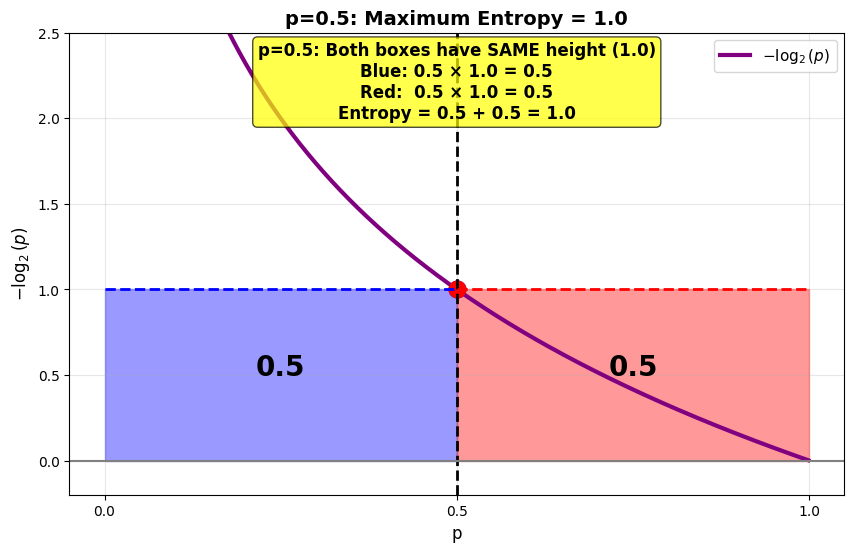


p = 0.5일 때:
-log₂(0.5) = 1.0
-log₂(1-0.5) = -log₂(0.5) = 1.0

두 박스 높이가 같음!
Blue: width=0.5, height=1.0, area=0.5
Red:  width=0.5, height=1.0, area=0.5

Entropy = 0.5 + 0.5 = 1.0 (Maximum!)



In [173]:
import numpy as np
import matplotlib.pyplot as plt

p_val = 0.5
p = np.linspace(0.001, 0.999, 1000)

plt.figure(figsize=(10, 6))

# 곡선
plt.plot(p, -np.log2(p), 'purple', linewidth=3, label=r'$-\log_2(p)$')

# p=0.5일 때
h_left = -np.log2(p_val)      # -log₂(0.5) = 1.0
h_right = -np.log2(1-p_val)   # -log₂(0.5) = 1.0 (같음!)

# 사각형
plt.fill_between([0, p_val], 0, h_left, alpha=0.4, color='blue')
plt.fill_between([p_val, 1], 0, h_right, alpha=0.4, color='red')

# 점들
plt.plot(p_val, h_left, 'bo', markersize=12)
plt.plot(1-p_val, h_right, 'ro', markersize=12)  # 같은 위치!

plt.axvline(p_val, color='black', linewidth=2, linestyle='--')
plt.axhline(0, color='grey')

# 높이 선
plt.hlines(h_left, 0, p_val, colors='blue', linestyles='dashed', linewidth=2)
plt.hlines(h_right, p_val, 1, colors='red', linestyles='dashed', linewidth=2)

# 면적
area_blue = p_val * h_left    # 0.5 × 1.0 = 0.5
area_red = (1-p_val) * h_right  # 0.5 × 1.0 = 0.5
entropy = area_blue + area_red   # 1.0

plt.text(p_val/2, h_left/2, f'{area_blue:.1f}', 
         fontsize=20, ha='center', fontweight='bold')
plt.text(p_val + (1-p_val)/2, h_right/2, f'{area_red:.1f}',
         fontsize=20, ha='center', fontweight='bold')

plt.text(0.5, 2.0, 
         f'p=0.5: Both boxes have SAME height (1.0)\n'
         f'Blue: 0.5 × 1.0 = 0.5\n'
         f'Red:  0.5 × 1.0 = 0.5\n'
         f'Entropy = 0.5 + 0.5 = 1.0',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
         fontsize=12, ha='center', fontweight='bold')

plt.xlabel('p', fontsize=12)
plt.ylabel(r'$-\log_2(p)$', fontsize=12)
plt.title(f'p=0.5: Maximum Entropy = {entropy:.1f}', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.2, 2.5)
plt.xticks([0, 0.5, 1])

plt.show()

print(f"""
p = 0.5일 때:
-log₂(0.5) = 1.0
-log₂(1-0.5) = -log₂(0.5) = 1.0

두 박스 높이가 같음!
Blue: width=0.5, height=1.0, area=0.5
Red:  width=0.5, height=1.0, area=0.5

Entropy = 0.5 + 0.5 = 1.0 (Maximum!)
""")

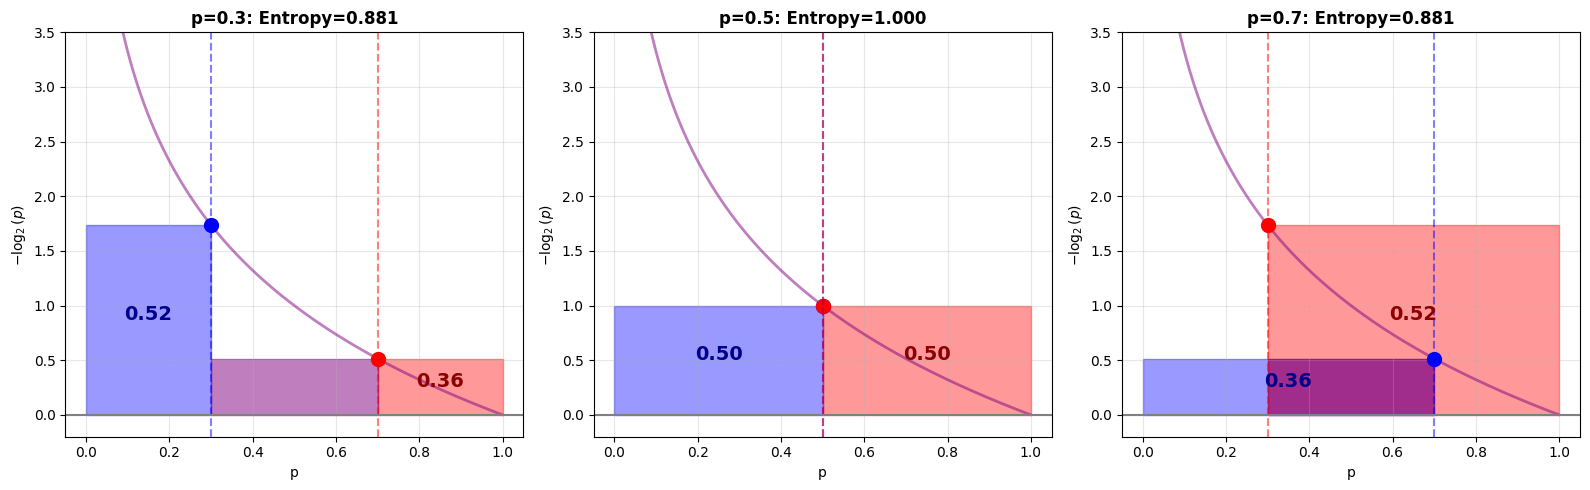

In [174]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, p_val in enumerate([0.3, 0.5, 0.7]):
    ax = axes[idx]
    p = np.linspace(0.001, 0.999, 1000)
    
    # 곡선
    ax.plot(p, -np.log2(p), 'purple', linewidth=2, alpha=0.5, label=r'$-\log_2(p)$')
    
    # 파란 박스: [0, p] 높이 -log₂(p)
    h_blue = -np.log2(p_val)
    ax.fill_between([0, p_val], 0, h_blue, alpha=0.4, color='blue')
    
    # 빨간 박스: [1-p, 1] 높이 -log₂(1-p) 
    # 즉, p=0.3이면 [0.7, 1.0]에 높이 -log₂(0.7)
    h_red = -np.log2(1-p_val)
    ax.fill_between([1-p_val, 1], 0, h_red, alpha=0.4, color='red')
    
    # 겹치는 영역 (보라색)
    overlap_start = max(p_val, 1-p_val) if p_val > 0.5 else p_val
    overlap_end = min(p_val, 1-p_val) if p_val < 0.5 else 1-p_val
    
    if p_val < 0.5:
        # 빨간게 더 넓음: [p_val, 1] 범위에서 겹침
        overlap_height = min(h_blue, h_red)
        ax.fill_between([p_val, 1-p_val], 0, overlap_height, 
                       alpha=0.5, color='purple')
    elif p_val > 0.5:
        # 파란게 더 넓음: [1-p_val, p_val] 범위에서 겹침
        overlap_height = min(h_blue, h_red)
        ax.fill_between([1-p_val, p_val], 0, overlap_height,
                       alpha=0.5, color='purple')
    
    # 점 표시
    ax.plot(p_val, h_blue, 'bo', markersize=10)
    ax.plot(1-p_val, h_red, 'ro', markersize=10)
    
    # 구분선
    ax.axvline(p_val, color='blue', linestyle='--', alpha=0.5)
    ax.axvline(1-p_val, color='red', linestyle='--', alpha=0.5)
    ax.axhline(0, color='grey')
    
    # 면적 계산
    area_blue = p_val * h_blue
    area_red = (1-p_val) * h_red
    entropy = area_blue + area_red
    
    ax.set_title(f'p={p_val}: Entropy={entropy:.3f}', fontsize=12, fontweight='bold')
    ax.set_xlabel('p')
    ax.set_ylabel(r'$-\log_2(p)$')
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.2, 3.5)
    ax.grid(alpha=0.3)
    
    # 텍스트
    ax.text(p_val/2, h_blue/2, f'{area_blue:.2f}', 
           ha='center', fontsize=14, fontweight='bold', color='darkblue')
    ax.text((1-p_val + 1)/2, h_red/2, f'{area_red:.2f}',
           ha='center', fontsize=14, fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()

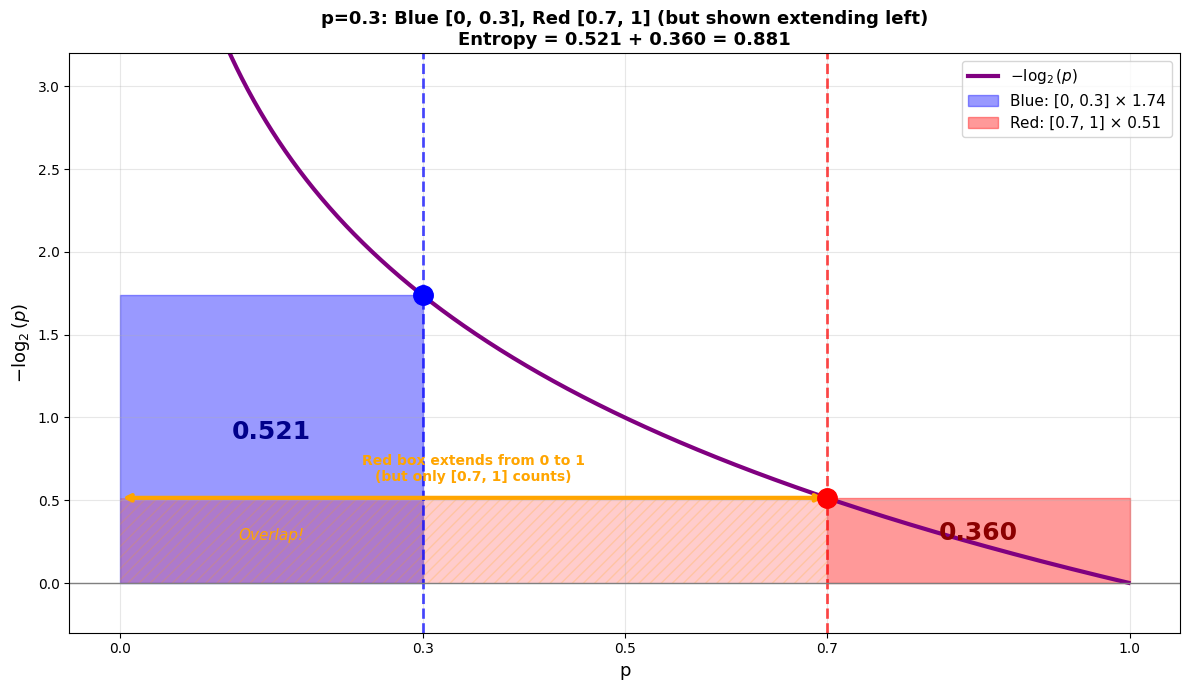

In [176]:
import numpy as np
import matplotlib.pyplot as plt

p_val = 0.3
p = np.linspace(0.001, 0.999, 1000)

plt.figure(figsize=(12, 7))

# 곡선
plt.plot(p, -np.log2(p), 'purple', linewidth=3, label=r'$-\log_2(p)$')

# 파란 박스: [0, p] × 높이 -log₂(p)
h_blue = -np.log2(p_val)
plt.fill_between([0, p_val], 0, h_blue, alpha=0.4, color='blue',
                 label=f'Blue: [0, {p_val}] × {h_blue:.2f}')

# 빨간 박스: [1-p, 1] × 높이 -log₂(1-p)  
h_red = -np.log2(1-p_val)
plt.fill_between([1-p_val, 1], 0, h_red, alpha=0.4, color='red',
                 label=f'Red: [{1-p_val}, 1] × {h_red:.2f}')

# 빨간 박스를 왼쪽으로도 확장해서 표시 (hatching으로 구분)
plt.fill_between([0, 1-p_val], 0, h_red, alpha=0.2, color='red', 
                 hatch='///', edgecolor='orange', linewidth=0)

# 점들
plt.plot(p_val, h_blue, 'bo', markersize=14, zorder=5)
plt.plot(1-p_val, h_red, 'ro', markersize=14, zorder=5)

# 구분선
plt.axvline(p_val, color='blue', linestyle='--', linewidth=2, alpha=0.7)
plt.axvline(1-p_val, color='red', linestyle='--', linewidth=2, alpha=0.7)
plt.axhline(0, color='grey', linewidth=1)

# 면적 표시
area_blue = p_val * h_blue
area_red = (1-p_val) * h_red
entropy = area_blue + area_red

plt.text(p_val/2, h_blue/2, f'{area_blue:.3f}', 
         fontsize=18, ha='center', fontweight='bold', color='darkblue')
plt.text((1-p_val + 1)/2, h_red/2, f'{area_red:.3f}',
         fontsize=18, ha='center', fontweight='bold', color='darkred')

# 겹치는 부분 표시 (파란 박스 아래쪽에 빨간 hatching)
plt.text(p_val/2, h_red/2, 'Overlap!', 
         fontsize=11, ha='center', style='italic', color='orange')

# 화살표로 빨간 박스 확장 표시
plt.annotate('', xy=(0, h_red), xytext=(1-p_val, h_red),
            arrowprops=dict(arrowstyle='<->', color='orange', lw=3))
plt.text(0.35, h_red + 0.1, f'Red box extends from 0 to 1\n(but only [{1-p_val}, 1] counts)',
         fontsize=10, ha='center', color='orange', fontweight='bold')

plt.xlabel('p', fontsize=13)
plt.ylabel(r'$-\log_2(p)$', fontsize=13)
plt.title(f'p={p_val}: Blue [0, {p_val}], Red [{1-p_val}, 1] (but shown extending left)\n'
          f'Entropy = {area_blue:.3f} + {area_red:.3f} = {entropy:.3f}',
          fontsize=13, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.3, 3.2)
plt.xticks([0, p_val, 0.5, 1-p_val, 1])

plt.tight_layout()
plt.show()

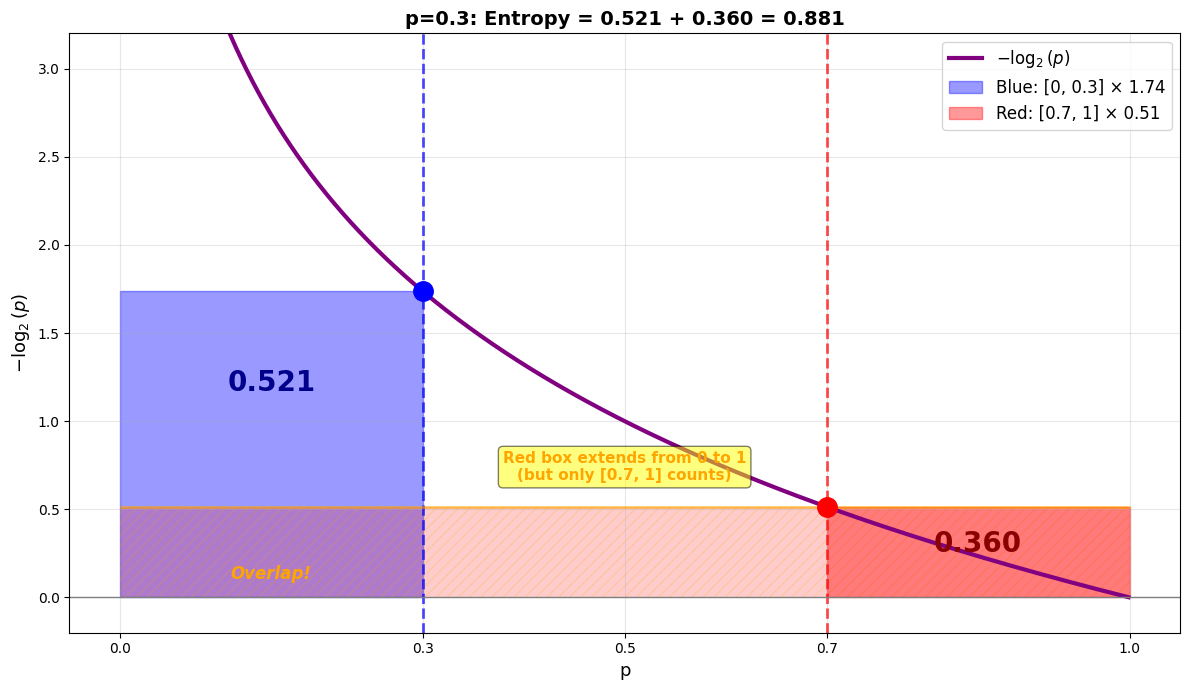

In [177]:
import numpy as np
import matplotlib.pyplot as plt

p_val = 0.3
p = np.linspace(0.001, 0.999, 1000)

plt.figure(figsize=(12, 7))

# 곡선
plt.plot(p, -np.log2(p), 'purple', linewidth=3, label=r'$-\log_2(p)$')

# 높이
h_blue = -np.log2(p_val)      # 1.74
h_red = -np.log2(1-p_val)     # 0.51

# 파란 박스: [0, 0.3]
plt.fill_between([0, p_val], 0, h_blue, alpha=0.4, color='blue',
                 label=f'Blue: [0, {p_val}] × {h_blue:.2f}')

# 빨간 박스: [0, 1] 전체에 표시 (hatching)
plt.fill_between([0, 1], 0, h_red, alpha=0.2, color='red', 
                 hatch='///', edgecolor='orange', linewidth=0)

# 빨간 박스: [0.7, 1] 진하게
plt.fill_between([1-p_val, 1], 0, h_red, alpha=0.4, color='red',
                 label=f'Red: [{1-p_val}, 1] × {h_red:.2f}')

# 점들
plt.plot(p_val, h_blue, 'bo', markersize=14, zorder=5)
plt.plot(1-p_val, h_red, 'ro', markersize=14, zorder=5)

# 구분선
plt.axvline(p_val, color='blue', linestyle='--', linewidth=2, alpha=0.7)
plt.axvline(1-p_val, color='red', linestyle='--', linewidth=2, alpha=0.7)
plt.axhline(0, color='grey', linewidth=1)

# 수평선 (빨간 박스 높이 표시)
plt.hlines(h_red, 0, 1, colors='orange', linestyles='-', linewidth=2, alpha=0.6)

# 면적 텍스트
area_blue = p_val * h_blue
area_red = (1-p_val) * h_red
entropy = area_blue + area_red

plt.text(p_val/2, h_blue/2 + 0.3, f'{area_blue:.3f}', 
         fontsize=20, ha='center', fontweight='bold', color='darkblue')
plt.text((1-p_val + 1)/2, h_red/2, f'{area_red:.3f}',
         fontsize=20, ha='center', fontweight='bold', color='darkred')

# 설명 텍스트
plt.text(0.5, h_red + 0.15, 'Red box extends from 0 to 1\n(but only [0.7, 1] counts)',
         fontsize=11, ha='center', color='orange', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.text(p_val/2, h_red/2 - 0.15, 'Overlap!', 
         fontsize=12, ha='center', style='italic', color='orange', fontweight='bold')

plt.xlabel('p', fontsize=13)
plt.ylabel(r'$-\log_2(p)$', fontsize=13)
plt.title(f'p={p_val}: Entropy = {area_blue:.3f} + {area_red:.3f} = {entropy:.3f}',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.3)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.2, 3.2)
plt.xticks([0, p_val, 0.5, 1-p_val, 1])

plt.tight_layout()
plt.show()

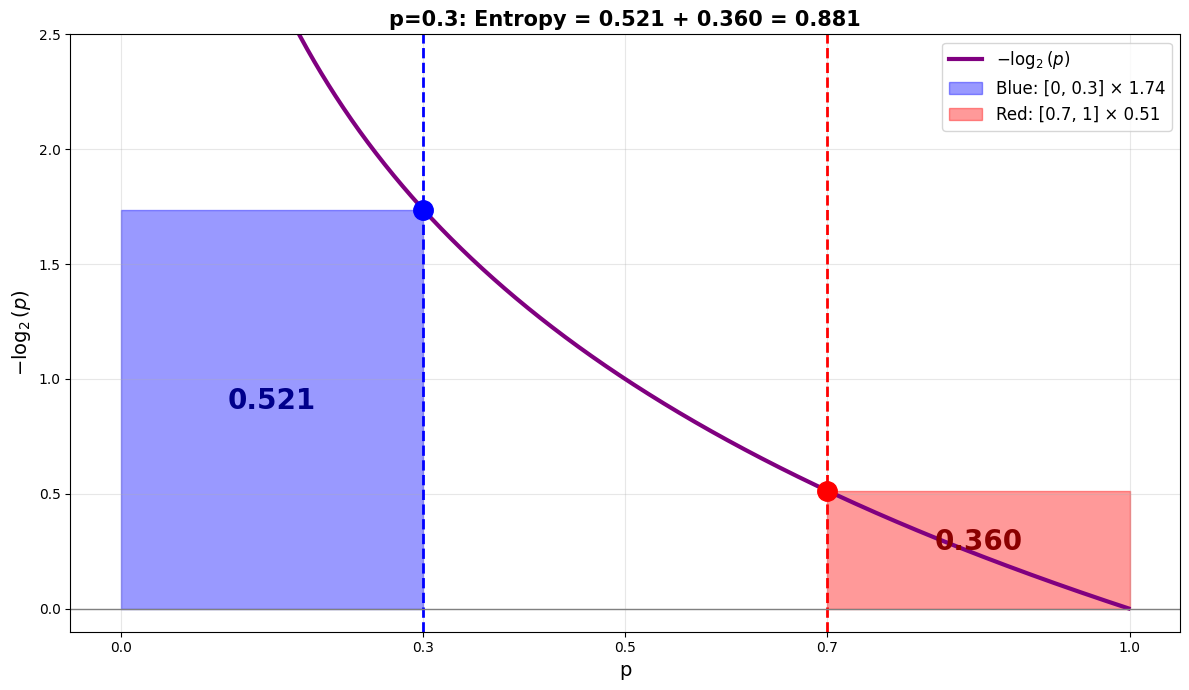

In [178]:
import numpy as np
import matplotlib.pyplot as plt

p_val = 0.3
p = np.linspace(0.001, 0.999, 1000)

plt.figure(figsize=(12, 7))

# 곡선
plt.plot(p, -np.log2(p), 'purple', linewidth=3, label=r'$-\log_2(p)$')

# 높이
h_blue = -np.log2(p_val)      # 1.74
h_red = -np.log2(1-p_val)     # 0.51

# 파란 박스: [0, 0.3] × 1.74
plt.fill_between([0, p_val], 0, h_blue, alpha=0.4, color='blue',
                 label=f'Blue: [0, {p_val}] × {h_blue:.2f}')

# 빨간 박스: [0.7, 1.0] × 0.51 만!
plt.fill_between([1-p_val, 1], 0, h_red, alpha=0.4, color='red',
                 label=f'Red: [{1-p_val}, 1] × {h_red:.2f}')

# 점들
plt.plot(p_val, h_blue, 'bo', markersize=14, zorder=5)
plt.plot(1-p_val, h_red, 'ro', markersize=14, zorder=5)

# 구분선
plt.axvline(p_val, color='blue', linestyle='--', linewidth=2)
plt.axvline(1-p_val, color='red', linestyle='--', linewidth=2)
plt.axhline(0, color='grey', linewidth=1)

# 면적
area_blue = p_val * h_blue
area_red = (1-p_val) * h_red
entropy = area_blue + area_red

plt.text(p_val/2, h_blue/2, f'{area_blue:.3f}', 
         fontsize=20, ha='center', fontweight='bold', color='darkblue')
plt.text((1-p_val + 1)/2, h_red/2, f'{area_red:.3f}',
         fontsize=20, ha='center', fontweight='bold', color='darkred')

plt.xlabel('p', fontsize=14)
plt.ylabel(r'$-\log_2(p)$', fontsize=14)
plt.title(f'p={p_val}: Entropy = {area_blue:.3f} + {area_red:.3f} = {entropy:.3f}',
          fontsize=15, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.1, 2.5)
plt.xticks([0, p_val, 0.5, 1-p_val, 1])

plt.tight_layout()
plt.show()

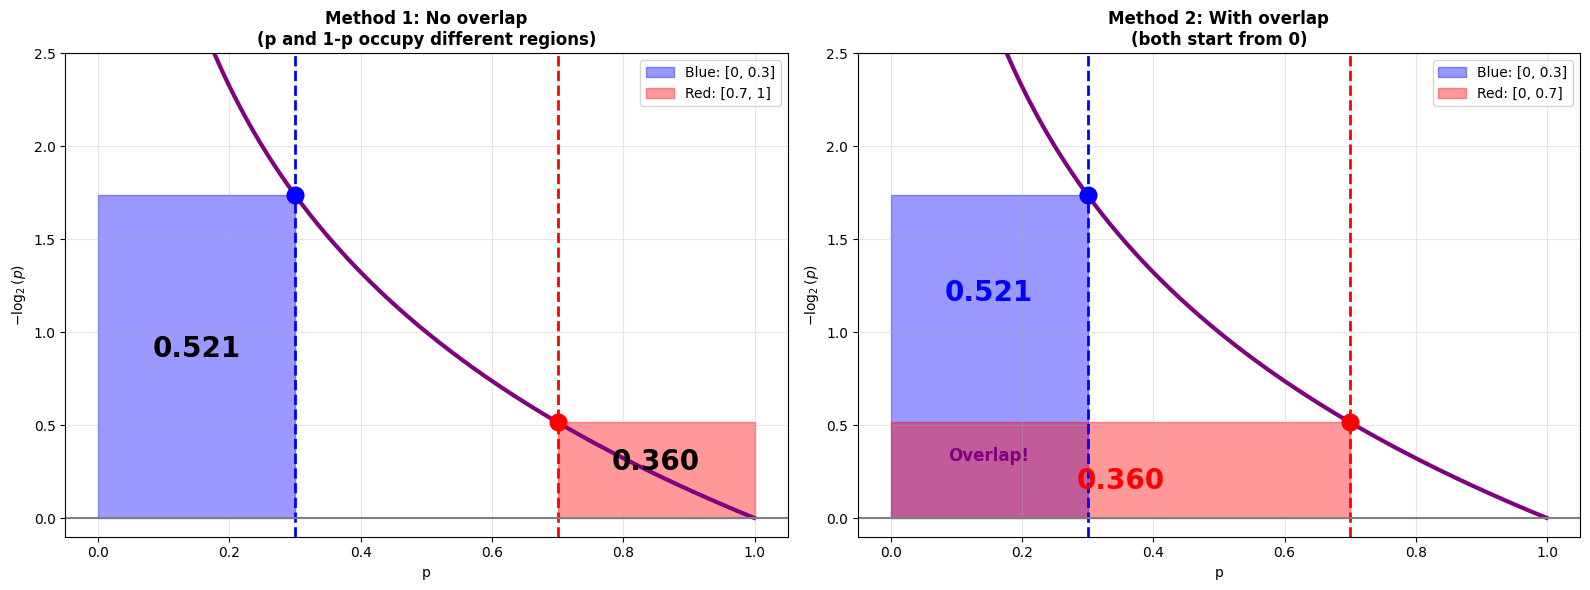

In [179]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

p_val = 0.3
p = np.linspace(0.001, 0.999, 1000)

# 방식 1: 원래 (겹치지 않음)
ax = axes[0]
h_blue = -np.log2(p_val)
h_red = -np.log2(1-p_val)

ax.plot(p, -np.log2(p), 'purple', linewidth=3)
ax.fill_between([0, p_val], 0, h_blue, alpha=0.4, color='blue',
                label=f'Blue: [0, {p_val}]')
ax.fill_between([1-p_val, 1], 0, h_red, alpha=0.4, color='red',
                label=f'Red: [{1-p_val}, 1]')
ax.plot(p_val, h_blue, 'bo', markersize=12)
ax.plot(1-p_val, h_red, 'ro', markersize=12)
ax.axvline(p_val, color='blue', linestyle='--', linewidth=2)
ax.axvline(1-p_val, color='red', linestyle='--', linewidth=2)
ax.axhline(0, color='grey')
ax.text(p_val/2, h_blue/2, '0.521', fontsize=20, ha='center', fontweight='bold')
ax.text((1-p_val+1)/2, h_red/2, '0.360', fontsize=20, ha='center', fontweight='bold')
ax.set_title('Method 1: No overlap\n(p and 1-p occupy different regions)', fontweight='bold')
ax.set_xlabel('p')
ax.set_ylabel(r'$-\log_2(p)$')
ax.legend()
ax.grid(alpha=0.3)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.1, 2.5)

# 방식 2: 대칭 (겹침)
ax = axes[1]
ax.plot(p, -np.log2(p), 'purple', linewidth=3)
ax.fill_between([0, p_val], 0, h_blue, alpha=0.4, color='blue',
                label=f'Blue: [0, {p_val}]')
ax.fill_between([0, 1-p_val], 0, h_red, alpha=0.4, color='red',
                label=f'Red: [0, {1-p_val}]')
ax.plot(p_val, h_blue, 'bo', markersize=12)
ax.plot(1-p_val, h_red, 'ro', markersize=12)
ax.axvline(p_val, color='blue', linestyle='--', linewidth=2)
ax.axvline(1-p_val, color='red', linestyle='--', linewidth=2)
ax.axhline(0, color='grey')
ax.text(p_val/2, h_blue/2+0.3, '0.521', fontsize=20, ha='center', fontweight='bold', color='blue')
ax.text((1-p_val)/2, h_red/2-0.1, '0.360', fontsize=20, ha='center', fontweight='bold', color='red')
ax.text(p_val/2, h_red/2+0.05, 'Overlap!', fontsize=12, ha='center', 
        fontweight='bold', color='purple')
ax.set_title('Method 2: With overlap\n(both start from 0)', fontweight='bold')
ax.set_xlabel('p')
ax.set_ylabel(r'$-\log_2(p)$')
ax.legend()
ax.grid(alpha=0.3)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.1, 2.5)

plt.tight_layout()
plt.show()

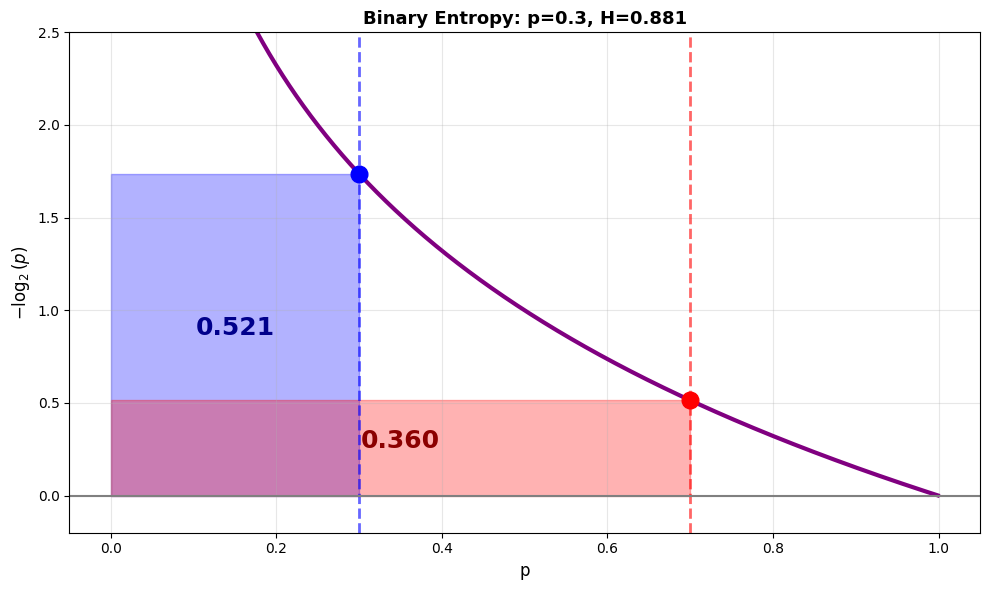

In [184]:
import numpy as np
import matplotlib.pyplot as plt

p_val = 0.3
p = np.linspace(0.001, 0.999, 1000)
h_blue = -np.log2(p_val)
h_red = -np.log2(1-p_val)
area_blue = p_val * h_blue
area_red = (1-p_val) * h_red

plt.figure(figsize=(10, 6))
plt.plot(p, -np.log2(p), 'purple', linewidth=3)
plt.fill_between([0, p_val], 0, h_blue, alpha=0.3, color='blue')
plt.fill_between([0, 1-p_val], 0, h_red, alpha=0.3, color='red')
plt.plot(p_val, h_blue, 'bo', markersize=12)
plt.plot(1-p_val, h_red, 'ro', markersize=12)
plt.axvline(p_val, color='blue', linestyle='--', linewidth=2, alpha=0.6)
plt.axvline(1-p_val, color='red', linestyle='--', linewidth=2, alpha=0.6)
plt.axhline(0, color='grey')
plt.text(p_val/2, h_blue/2, f'{area_blue:.3f}', 
         fontsize=18, ha='center', fontweight='bold', color='darkblue')
plt.text((1-p_val)/2, h_red/2, f'{area_red:.3f}',
         fontsize=18, ha='center', fontweight='bold', color='darkred')
plt.xlabel('p', fontsize=12)
plt.ylabel(r'$-\log_2(p)$', fontsize=12)
plt.title(f'Binary Entropy: p={p_val}, H={area_blue + area_red:.3f}', 
          fontsize=13, fontweight='bold')
plt.grid(alpha=0.3)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.2, 2.5)
plt.tight_layout()
plt.show()